# Data Analysis for Social Sciences: Lab 4

***UNI:*** sk4819 | ***Date:*** November 11, 2021

In [1]:
#Importing libraries
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [36]:
wvs = pd.read_csv("/Users/shreyanskothari/Desktop/Data Analysis for Social Sciences/Labs/Lab 4/WVS.csv", sep = ',')
wvs.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


___
## 1. Run a simple regression, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)  
### How does the importance of family, friends, and work in one's life affect their satisfaction with life? Does one's age affect one's overall satisfaction with life in the US? I expect people who give less importance to family, friends, and work to be overall less satisfied with life, compared to people who give more importance to family, friends, and work. 
#### The actual question: 
- On a scale of 1 (Very Important) to 4 (Not at all important), indicate how important is family in your life. (V4)
- On a scale of 1 (Very Important) to 4 (Not at all important), indicate how important are friends in your life. (V5)
- On a scale of 1 (Very Important) to 4 (Not at all important), indicate how important is work in your life. (V8)
- On a scale of 1 (Completely disastisfied) to 10 (Completely satisfied), how satisfied are you with your life as a whole? (V23)

In [37]:
#Renaming variables
wvs.rename(columns={'V4':'fam_imp', ## this asks how important is family in your life
                    'V5': 'frnd_imp',## this asks how important are friends in your life
                    'V242':'age',
                    'V8': 'work_imp', ## this asks how important is work in your life
                    'V2':'country',
                    'V23': 'life_sat'}, ## All things considered, how satisfied are you with your life as a whole these days? 
                                        # 1 means 'completely dissatisfied' and 10 means 'completely satisfied' 
                 inplace=True)

In [38]:
wvs[['age', 'fam_imp', 'frnd_imp', 'work_imp', 'country', 'life_sat']].head(10)

,age,fam_imp,frnd_imp,work_imp,country,life_sat
0,21.0,1.0,1.0,1.0,12,8.0
1,24.0,1.0,2.0,2.0,12,5.0
2,26.0,1.0,3.0,2.0,12,4.0
3,28.0,1.0,1.0,3.0,12,8.0
4,35.0,1.0,1.0,1.0,12,8.0
5,36.0,1.0,2.0,4.0,12,7.0
6,41.0,1.0,1.0,1.0,12,7.0
7,44.0,1.0,1.0,2.0,12,5.0
8,59.0,1.0,1.0,2.0,12,6.0
9,72.0,1.0,1.0,1.0,12,5.0


array([[<AxesSubplot:title={'center':'life_sat'}>]], dtype=object)

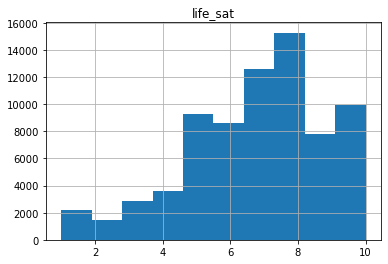

In [72]:
wvs.hist('life_sat')

array([[<AxesSubplot:title={'center':'work_imp'}>]], dtype=object)

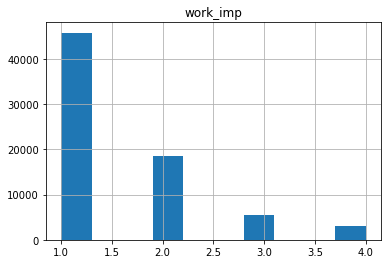

In [39]:
wvs.hist('work_imp')

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

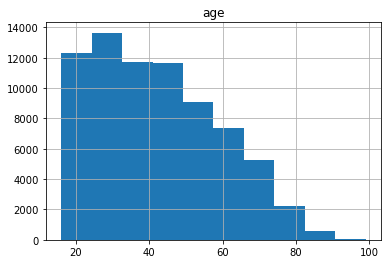

In [40]:
wvs.hist('age')

array([[<AxesSubplot:title={'center':'fam_imp'}>]], dtype=object)

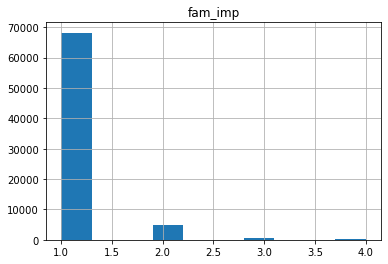

In [63]:
wvs.hist('fam_imp')

array([[<AxesSubplot:title={'center':'frnd_imp'}>]], dtype=object)

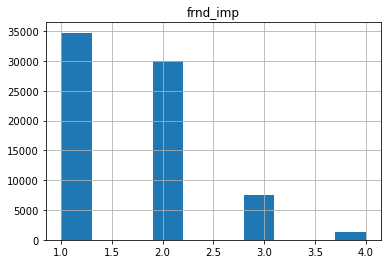

In [64]:
wvs.hist('frnd_imp')

In [71]:
lm1 = smf.ols(formula = 'life_sat ~ age + fam_imp + frnd_imp + work_imp', data = wvs, subset = wvs['country']==840).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               life_sat   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     29.67
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.61e-24
Time:                        13:02:19   Log-Likelihood:                -4418.5
No. Observations:                2195   AIC:                             8847.
Df Residuals:                    2190   BIC:                             8876.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7359      0.190     46.040      0.0

***Interpretation***
- `age`: Holding all other variables constant, on average, every additional year of age is associated with a 0.0032 units increase in respondent's satisfaction with life.
- `fam_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of family in the respondent's life is associated with a 0.8466 units reduction in respondent's satisfaction with life. 
- `frnd_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of friends in the respondent's life is associated with a 0.2841 units reduction in respondent's satisfaction with life. 
- `work_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of work in the respondent's life is associated with a 0.0466 units reduction in respondent's satisfaction with life. 

#### The model does meet my expectation; family, friends, and purpose (work) are important in our lives. These factors dictate the quality of our lives and how satisfied we are with it. If we give more importance to these factors, overall we are more satisfied with life. Additionally, the respondents' overall satisfaction with life improved with age. This could again be related to family and work; families grow with time, and your employment outcomes improve with time and experience.

***Note***: the work_imp and age coefficients are not as statistically significant (p-value > 0.05) as fam_imp and frnd_imp. 

___
## 2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2.  Explain why you think an interaction might be present and in what direction it would work.  Explain your results.  Did it work out?  Yes?  No?  

### I am including an interaction term between fam_imp and frnd_imp: importance of family and importance of friends. I am doing so because I suspect these to be correlated. A lot of times, people value friends just as much as they value family, and in a lot of cases people might even value their friends more than they value their families. In some cases, people consider their friends their family. 
### I expect this interaction to have a positive coefficient - i.e., I expect the dependent variable to improve with every additional unit reduction in importance of friendsXfamily.  This is because both fam_imp and frnd_imp had a negative coefficent in the last model, thus their interaction should have a positive coefficient. 

In [76]:
wvs[['age', 'fam_imp', 'frnd_imp', 'work_imp', 'country', 'life_sat']].corr()

,age,fam_imp,frnd_imp,work_imp,country,life_sat
age,1.000000,0.017101,0.069069,0.205875,-0.022905,-0.031424
fam_imp,0.017101,1.000000,0.153918,0.138584,-0.032931,-0.078181
frnd_imp,0.069069,0.153918,1.000000,0.097959,-0.029173,-0.089057
work_imp,0.205875,0.138584,0.097959,1.000000,0.023510,-0.046071
country,-0.022905,-0.032931,-0.029173,0.023510,1.000000,0.002498
life_sat,-0.031424,-0.078181,-0.089057,-0.046071,0.002498,1.000000


In [77]:
lm2 = smf.ols(formula = 'life_sat ~ age + fam_imp * frnd_imp + work_imp', data = wvs, subset = wvs['country']==840).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               life_sat   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     24.04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.30e-23
Time:                        13:37:45   Log-Likelihood:                -4417.8
No. Observations:                2195   AIC:                             8848.
Df Residuals:                    2189   BIC:                             8882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0588      0.326  

***Interpretation***:
- `age`: Holding all other variables constant, on average, every additional year of age is associated with a 0.0033 units increase in respondent's satisfaction with life.
- `fam_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of family in the respondent's life is associated with a 1.1261 units reduction in respondent's satisfaction with life. 
- `frnd_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of friends in the respondent's life is associated with a 0.4225 units reduction in respondent's satisfaction with life. 
- `fam_imp:frnd_imp` : Holding all other variables constant, on average, every additional unit reduction in the importance of family and friends in the respondent's life is associated with a 1.4328 units reduction in respondent's satisfaction with life.
    - 0.1158-1.1261-0.4225 = -1.4328
- `work_imp`: Holding all other variables constant, on average, every additional unit reduction in the importance of work in the respondent's life is associated with a 0.0517 units reduction in respondent's satisfaction with life. 


Including the interaction term improves the strength of the fam_imp and frnd_imp cofficients on life_sat. However, the interaction isn't statistically significant ( p-value = 0.222).  

### As expected, the coefficient of the interaction has a positive coefficient - it is positively associated with the dependent variable. However, since it is statistically insignificant at all values of alpha, we should not include it in the model. 

### No, it did not work out. 

___
## 3. Give me an update on your independent project.  What do you plan to investigate?  What are your hypotheses?  What date are you using?  How can we help?  Write your answer here in the lab report, but also send your answer as an email to me at gme2101@columbia.edu with subject "Independent Project Update - [insert your name]"

I plan to investigate the relationship between residential/consumption-based carbon emissions in the US and income inequality, as measured by the Theil index. I am using data from US Environmental Protection Agency for carbon emissions and a publicly shared data on income inequality which was compiled by economist Mark Frank. 

***Hypothesis***: The paper hypothesizes that there is a positive relationship between income inequality, as measured by the Theil index, and consumption-based carbon emissions in the US. If programs/projects/policies are implemented to alleviate income inequality in the United States, we can expect the consumption-based carbon emissions to decline as well. I propose that in order to control income inequality along with carbon emissions, the household income levels in the US would have to converge somewhere in the middle of the income spectrum at an equilibrium, rather than a universal upward movement in the economic status of American citizens. Reduction in income inequality in the context of this paper refers to a combined effect of improvement in the spending abilities and income opportunities for low income households and a curtailment of over-consumption and the ability to amass exorbitant wealth in the richer sections of society.

Improving economic outcomes for low income communities in the US would allow individuals residing in those communities to make smarter sustainable decisions, as such decisions tend to be costlier or have a large initial capital requirement associated with them. Better income would also allow individuals in low income communities to improve their quality of education and educational outcomes – which in turn would expand their knowledge of environmental costs and consequences associated with different activities. Additionally, it is important to mention that distressing over the environmental impact of one's activities is a privilege that the poorest communities do not enjoy. People who have to work multiple jobs to feed themselves and their family do not have the capacity to consider how their choices could translate into environmental degradation.

At the same time, there is a need for restricting consumption-based carbon emissions by curtailing over-consumption in affluent households. In a recent study published by the University of Michigan, emissions from residential energy use in 93 million homes were analyzed to investigate affluence and greenhouse gas emissions in the US. The study concluded that wealthier American households emit about 25% more carbon than lower-income households, “with emissions up to 15 times higher in especially affluent suburbs.” Residential energy is estimated to account for 20% of the total greenhouse gas emissions in the US. To curb consumption-based carbon emissions, policies and projects that target income inequality need to include structures that limit the spending ability and consumption capacity of extremely wealthy households.

***Help needed***: I have more or less decided on using Theil as a measure of inequality but I want to further explore the pros and cons of Gini vs Theil. If you have any suggestions and/or reccommendations for books/articles/papers, I am all ears! 